In [ ]:
#Student Name: Ponduru Vaishnavi
#Student Id: 700780632

In [2]:
import sys
print(sys.executable)


/opt/homebrew/Cellar/jupyterlab/4.4.6/libexec/bin/python


In [5]:
!{sys.executable} -m pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 42.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [ ]:
#Programming Problem 1
#Decision tree with max depth=1,2,3

In [1]:
# Decision Tree on Iris dataset


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

#Load the dataset
iris=load_iris()
X,y=iris.data,iris.target

# Split into train & test sets
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42,stratify=y
)

#Train trees with different max_depth values
depths=[1,2,3]
results=[]

for d in depths:
    model=DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train,y_train)
    
    train_acc=accuracy_score(y_train,model.predict(X_train))
    test_acc=accuracy_score(y_test,model.predict(X_test))
    
    results.append({"max_depth": d,
                    "Train Accuracy": train_acc,
                    "Test Accuracy": test_acc})

# 3️⃣ Display results
df_results=pd.DataFrame(results)
print(df_results)



   max_depth  Train Accuracy  Test Accuracy
0          1        0.666667       0.666667
1          2        0.971429       0.888889
2          3        0.980952       0.977778


In [ ]:
#Depth=1: Likely underfitting (simple tree, low train/test accuracy).
#Depth=2: Better fit, higher accuracy.
#Depth=3: Very good fit; watch for overfitting if depth keeps growing.

In [ ]:
#Programming Problem 2
#KNN on Iris dataset (2 features)–Decision Boundaries

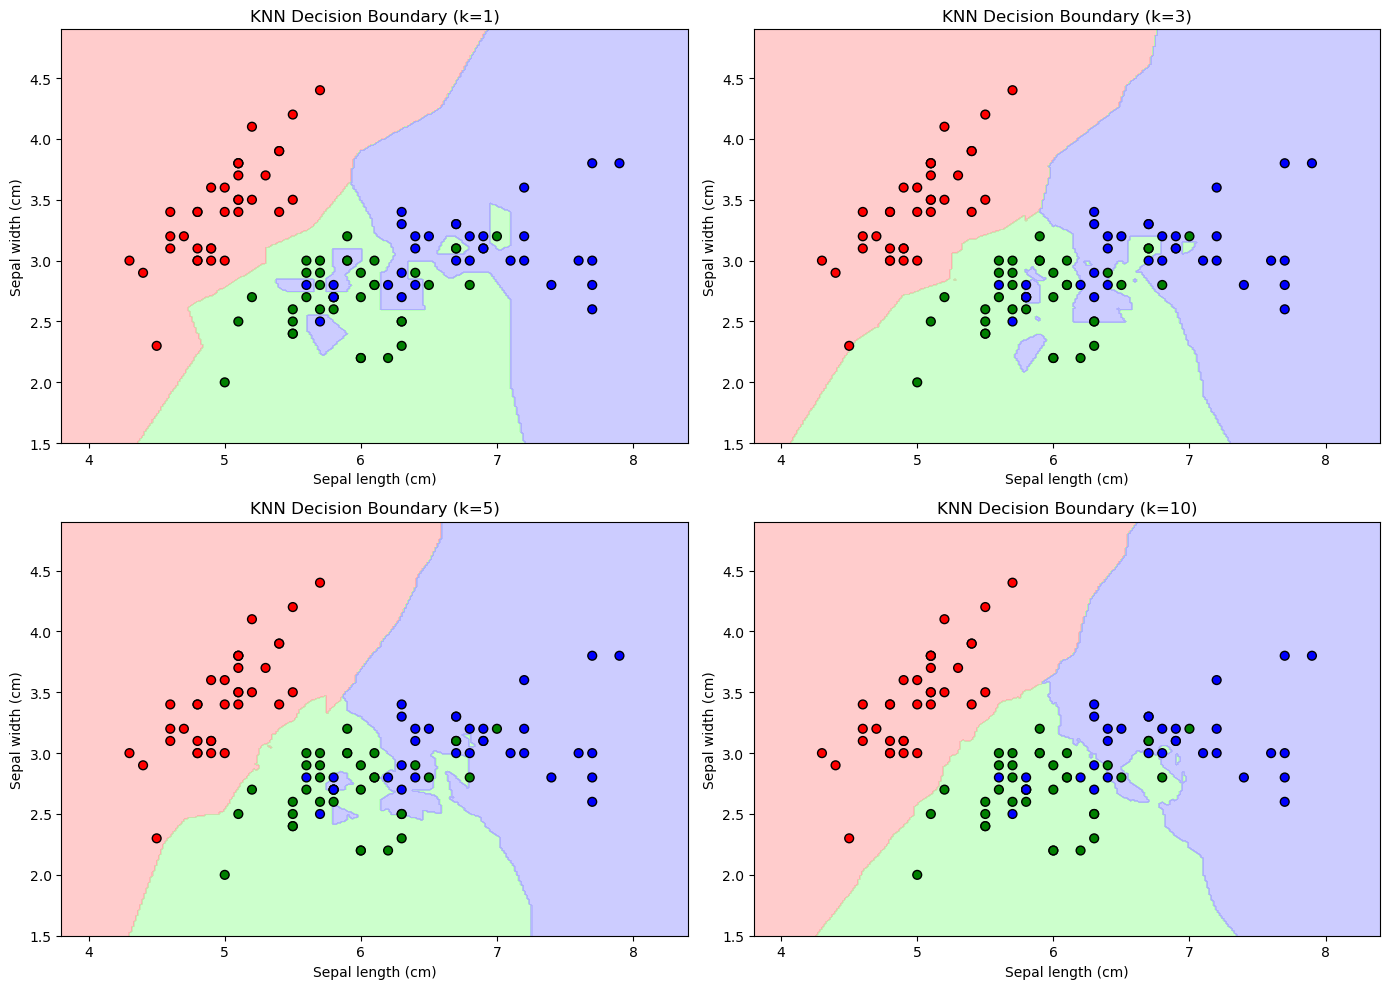

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

#Load Iris dataset (only sepal length & sepal width)
iris = datasets.load_iris()
X = iris.data[:, :2]        # take first 2 columns
y = iris.target

#Split into train & test for reference (not required for plotting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define K values
k_values = [1, 3, 5, 10]

#Color maps for plotting
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

#Train models & plot boundaries
plt.figure(figsize=(14, 10))

for i, k in enumerate(k_values, 1):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    #Mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=40, cmap=ListedColormap(cmap_bold))
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")

plt.tight_layout()
plt.show()


In [ ]:
#Programming Problem 3
# kNN (k=5) on Iris dataset with evaluation metrics & ROC curve

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



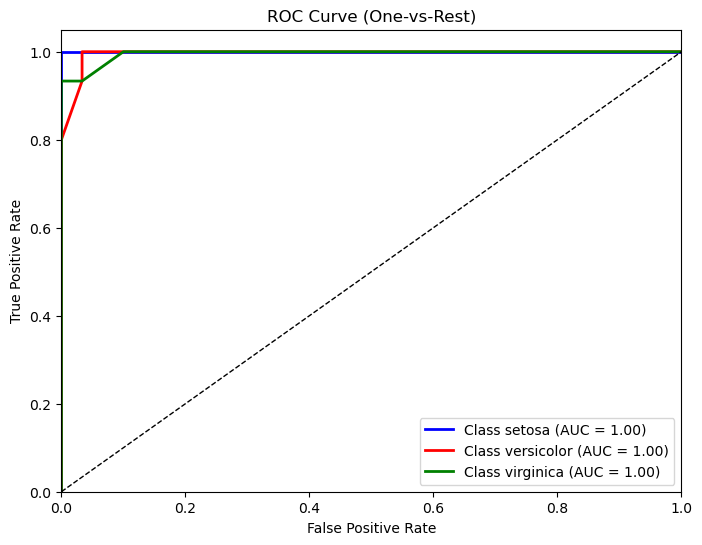

Macro AUC: 0.997037037037037
Weighted AUC: 0.997037037037037


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from itertools import cycle

#Load dataset & split
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Train kNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predictions
y_pred = knn.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#Accuracy, precision, recall, F1
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

#ROC curve & AUC (multi-class, one-vs-rest)
y_score = knn.predict_proba(X_test)
y_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(["blue", "red", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {iris.target_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()

# Macro & weighted AUC
print("Macro AUC:", roc_auc_score(y_bin, y_score, average="macro"))
print("Weighted AUC:", roc_auc_score(y_bin, y_score, average="weighted"))
